
Decision Tree Optimization:
Best DT Params: {'class_weight': None, 'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best DT CV F1: 0.9325482710419161
DT Test Accuracy: 0.9609984399375975
DT Test F1-score: 0.9452954048140044


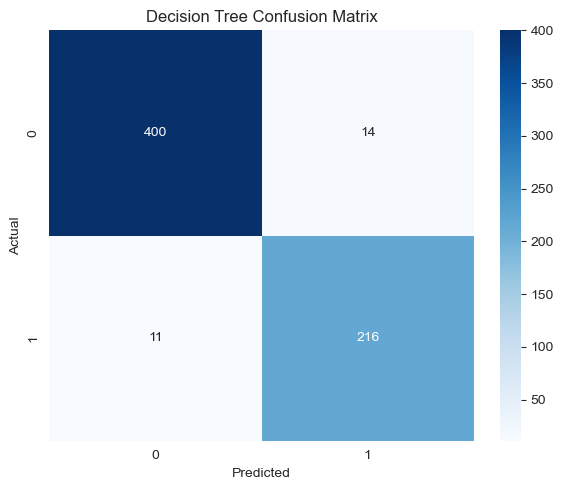

DT Cross-Validation F1: 0.9257190427208573

XGBoost Optimization:
{'objective': 'binary:logistic', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': 1.0, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': 'logloss', 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.1, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 5, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': 100, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': 42, 'reg_alpha': 0.01, 'reg_lambda': 10.0, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': 1.0, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}
Best XGB Params: {'colsample_bytree': 

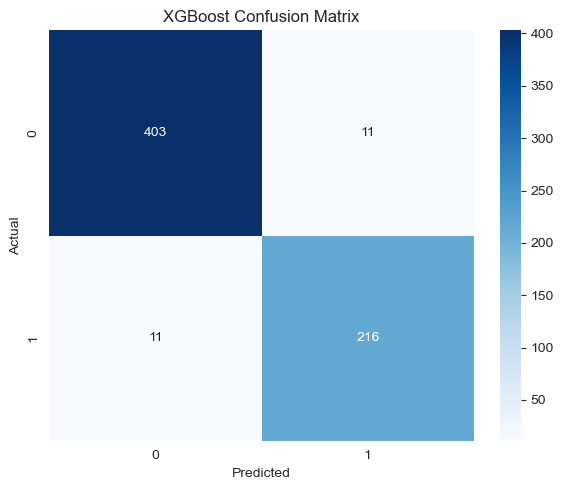

XGB Cross-Validation F1: 0.9315097292583632


In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

from analyze.ConfusionMatrixPlotter import ConfusionMatrixPlotter
from training.ClassificationMetrics import ClassificationMetrics
from training.CrossValidator import CrossValidator
from training.DecisionTreeModel import DecisionTreeModel
from training.DecisionTreeOptimizer import DecisionTreeOptimizer
from training.StratifiedTrainTestSplitter import StratifiedTrainTestSplitter
from training.XGBoostModel import XGBoostModel
from training.XGBoostOptimizer import XGBoostOptimizer

# 1. Load data
data = pd.read_csv("../data_generation/data/impute_minmax.csv")
X = data.drop(columns=["Diagnosis"]).values
y = LabelEncoder().fit_transform(data["Diagnosis"])

# 2. Train-test split
splitter = StratifiedTrainTestSplitter(test_size=0.3, random_state=42)
X_train, X_test, y_train, y_test = splitter(X, y)

# -----------------------------
# Decision Tree Pipeline
# -----------------------------
print("\nDecision Tree Optimization:")
dt_optimizer = DecisionTreeOptimizer(random_state=42)
best_dt_model, best_dt_params, best_dt_score = dt_optimizer.optimize(X_train, y_train)

print("Best DT Params:", best_dt_params)
print("Best DT CV F1:", best_dt_score)

dt_model = DecisionTreeModel()
dt_model.model = best_dt_model

# Evaluate on test set
dt_model.train(X_train, y_train)
dt_y_pred = dt_model.predict(X_test)
dt_metrics = ClassificationMetrics(y_test, dt_y_pred, positive_label=1)
print("DT Test Accuracy:", dt_metrics.accuracy())
print("DT Test F1-score:", dt_metrics.f1_score())
ConfusionMatrixPlotter.plot(y_test, dt_y_pred, labels=["0", "1"], title="Decision Tree Confusion Matrix")

# Cross-validation
dt_cv = CrossValidator(model=dt_model, k=5, random_state=42, positive_label=1)
dt_cv_results = dt_cv.evaluate(X, y)
print("DT Cross-Validation F1:", dt_cv_results["mean_f1_score"])

# -----------------------------
# XGBoost Pipeline
# -----------------------------
print("\nXGBoost Optimization:")
xgb_optimizer = XGBoostOptimizer(random_state=42)
best_xgb_model, best_xgb_params, best_xgb_score = xgb_optimizer.optimize(X_train, y_train)
print(best_xgb_model.get_params())

print("Best XGB Params:", best_xgb_params)
print("Best XGB CV F1:", best_xgb_score)

xgb_model = XGBoostModel()
xgb_model.model = best_xgb_model

# Evaluate on test set
xgb_model.train(X_train, y_train)
xgb_y_pred = xgb_model.predict(X_test)
xgb_metrics = ClassificationMetrics(y_test, xgb_y_pred, positive_label=1)
print("XGB Test Accuracy:", xgb_metrics.accuracy())
print("XGB Test F1-score:", xgb_metrics.f1_score())
ConfusionMatrixPlotter.plot(y_test, xgb_y_pred, labels=["0", "1"], title="XGBoost Confusion Matrix")

# Cross-validation
xgb_cv = CrossValidator(model=xgb_model, k=5, random_state=42, positive_label=1)
xgb_cv_results = xgb_cv.evaluate(X, y)
print("XGB Cross-Validation F1:", xgb_cv_results["mean_f1_score"])
